In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
data = pd.read_csv('/Users/andrewacosta/Downloads/train.csv')

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
data.shape

(891, 12)

In [36]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [38]:
data = data.drop('Name', axis = 1)

In [39]:
data = data.drop('PassengerId', axis = 1)

In [40]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
data.columns = list(map(lambda x: x.lower(), data.columns))

In [42]:
data.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
data['survived'] = data['survived'].astype('object')

In [44]:
data.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


/Users/andrewacosta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

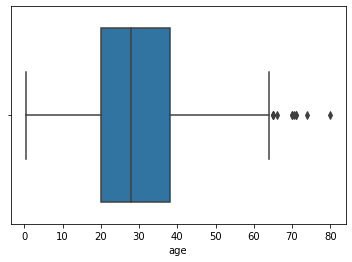

In [45]:
sns.boxplot(data['age'])

In [46]:
tdata = data[data['age'].isna() == False]['age']

In [47]:
median_age = np.median(tdata)

In [48]:
data['age'] = data['age'].fillna(median_age)

In [49]:
data.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [50]:
data['cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [51]:
def clean_cab(x):
    if pd.isna(x):
        return np.nan
    else:
        return x[0]

In [52]:
data['cabin'] = list(map(clean_cab, data['cabin']))

In [53]:
data['cabin'] = data['cabin'].fillna('C')

In [54]:
data['cabin'].value_counts()

C    746
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin, dtype: int64

In [22]:
data['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [55]:
data['embarked'] = data['embarked'].fillna('S')

In [57]:
data['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [58]:
data['cabin'].value_counts()

C    746
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin, dtype: int64

In [59]:
def clean_cab2(x):
    if x == 'G' or x == 'T':
        return 'F'
    else: 
        return x

In [60]:
data['cabin'] = list(map(clean_cab2, data['cabin']))

In [61]:
data.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,C,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,C,S
3,1,1,female,35.0,1,0,113803,53.1000,C,S
4,0,3,male,35.0,0,0,373450,8.0500,C,S


In [62]:
data.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

In [63]:
data['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [64]:
data['pclass'] = data['pclass'].astype('object')

In [65]:
data['sibsp'].dtype

dtype('int64')

In [67]:
data['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [68]:
data.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,C,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,C,S
3,1,1,female,35.0,1,0,113803,53.1000,C,S
4,0,3,male,35.0,0,0,373450,8.0500,C,S


/Users/andrewacosta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

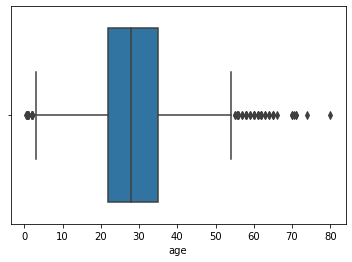

In [69]:
sns.boxplot(data['age'])

/Users/andrewacosta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

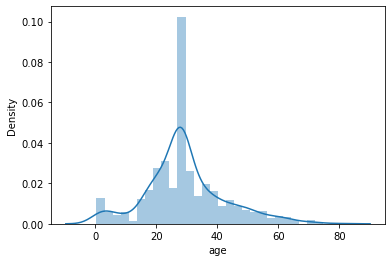

In [70]:
sns.distplot(data['age'])

/Users/andrewacosta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

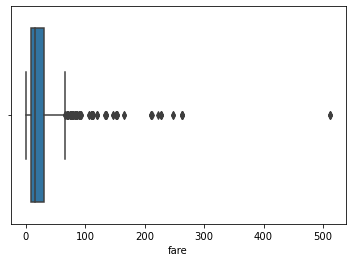

In [71]:
sns.boxplot(data['fare'])

/Users/andrewacosta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

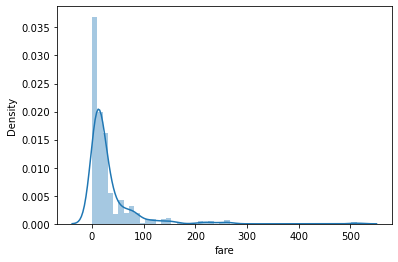

In [72]:
sns.distplot(data['fare'])

In [73]:
cbfare = list(map(lambda x: x**0.333, data['fare']))

/Users/andrewacosta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

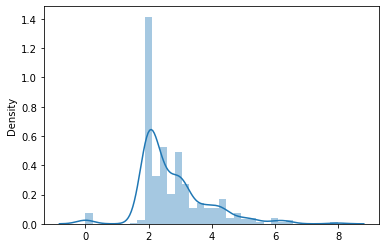

In [74]:
sns.distplot(cbfare)

In [75]:
def log_tran(x):
    if x<=0:
        return 0
    else:
        return np.log(x)

In [76]:
log_fare = list(map(log_tran, data['fare']))

/Users/andrewacosta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

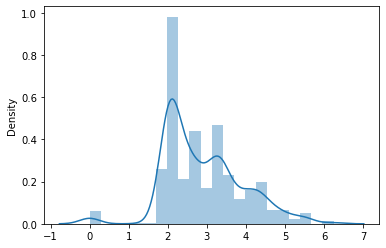

In [77]:
sns.distplot(log_fare)

In [78]:
data['fare'] = log_fare

/Users/andrewacosta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

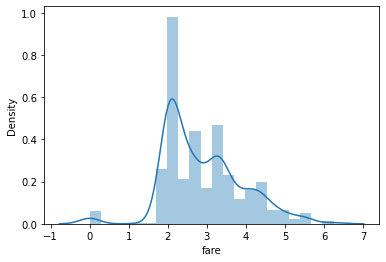

In [79]:
sns.distplot(data['fare'])

In [80]:
data['survived'] = data['survived'].astype('int')

In [83]:
data = data.drop('ticket', axis=1)

In [84]:
y = data['survived']
x = data.drop('survived', axis = 1)

In [85]:
x.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,3,male,22.0,1,0,1.981001,C,S
1,1,female,38.0,1,0,4.266662,C,C
2,3,female,26.0,0,0,2.070022,C,S
3,1,female,35.0,1,0,3.972177,C,S
4,3,male,35.0,0,0,2.085672,C,S


In [86]:
numericals = x[['age', 'sibsp', 'fare']]

In [87]:
categoricals = x[['pclass', 'sex', 'parch', 'cabin', 'embarked']]

In [88]:
scaled = Normalizer().fit_transform(numericals)
scaled = pd.DataFrame(scaled)
scaled

,0,1,2
0,0.994951,0.045225,0.089591
1,0.993416,0.026143,0.111541
2,0.996846,0.000000,0.079365
3,0.993221,0.028378,0.112721
4,0.998229,0.000000,0.059485
...,...,...,...
886,0.995518,0.000000,0.094572
887,0.984353,0.000000,0.176209
888,0.993087,0.035467,0.111895
889,0.991552,0.000000,0.129710


In [89]:
encoded = OneHotEncoder(drop='first').fit_transform(categoricals).toarray()
encoded = pd.DataFrame(encoded) 
encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [90]:
features = pd.concat([scaled, encoded], axis = 1)
features

,0,1,2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.994951,0.045225,0.089591,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.993416,0.026143,0.111541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.996846,0.000000,0.079365,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.993221,0.028378,0.112721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.998229,0.000000,0.059485,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.995518,0.000000,0.094572,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,0.984353,0.000000,0.176209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.993087,0.035467,0.111895,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
889,0.991552,0.000000,0.129710,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [91]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.1, random_state = 42)

In [92]:
X_train

,0,1,2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
165,0.947997,0.000000,0.318279,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
541,0.862626,0.383389,0.329985,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
625,0.998381,0.000000,0.056887,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
388,0.997344,0.000000,0.072842,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
76,0.997288,0.000000,0.073597,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.995339,0.000000,0.096439,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
270,0.992563,0.000000,0.121730,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
860,0.996743,0.048622,0.064345,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
435,0.944051,0.067432,0.322831,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [93]:
X_test

,0,1,2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
709,0.994672,0.035524,0.096778,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
439,0.997136,0.000000,0.075634,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
840,0.994686,0.000000,0.102951,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
720,0.863998,0.000000,0.503496,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
39,0.982959,0.070211,0.169886,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0.998493,0.000000,0.054876,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
215,0.988058,0.031873,0.150753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
309,0.991046,0.000000,0.133521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
822,1.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [94]:
model = LogisticRegression(multi_class='ovr').fit(X_train, y_train)

In [95]:
pred = model.predict(X_test)

In [96]:
accuracy_score(y_test, pred)

0.8111111111111111

In [97]:
confusion_matrix(y_test, pred)

array([[45,  9],
       [ 8, 28]])

In [99]:
pd.Series(pred).value_counts()

0    53
1    37
dtype: int64

In [101]:
data['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64